### Importing the Dependencies

#### Import the libraries for data analysis and data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Reading the csv file to generate dataset

In [2]:
train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Converting the images to numpy arrays to feed into the tensorflow model, and splitting into features and labels

In [5]:
train_data = np.array(train_df)
test_data = np.array(test_df)

In [6]:
X_train = train_data[:, 1:]
y_train = train_data[:, 0]

X_test = test_data[:, 1:]
y_test = test_data[:, 0]

#### Checking the size of train and test arrays, which contain the images and labels

In [7]:
print(len(X_train))
print(len(X_test))

60000
10000


In [8]:
print(len(y_train))
print(len(y_test))

60000
10000


In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape

(10000,)

#### Reshaping the images array to convert into 28x28 input shape

In [11]:
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

#### Reshaping the labels array to plot the images and creating the plot_image function

In [14]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [15]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(X, y, index):
    
    plt.figure(figsize=(15,2))
    
    plt.imshow(X[index], cmap=plt.get_cmap('gray'))
    plt.xlabel(labels[y[index]])

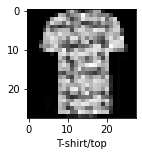

In [16]:
plot_image(X_train, y_train, 3)

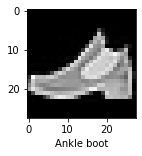

In [17]:
plot_image(X_train, y_train, 1)

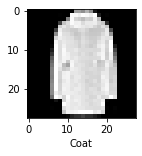

In [18]:
plot_image(X_train, y_train, 6)

#### Normalizing to improve accuracy, can be easily achieved through tensorflow

Normalization is a process that changes the range of pixel intensity values. The purpose of dynamic range expansion in the various applications is usually to bring the image, or other type of signal, into a range that is more familiar or normal to the senses, hence the term normalization. 

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

In [20]:
X_test.shape

(10000, 28, 28)

In [21]:
np.unique(y_train) #last layer will have 10 neurons

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

#### Spliting the training data further into training, and validation data 

The splitting is basically done is to prevent our model from overfitting i.e., the model becomes really good at classifying the samples in the training set but cannot generalize and make accurate classifications on the data it has not seen before, and also to get the stats from the model

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [24]:
len(X_train)

48000

In [25]:
len(X_validate)

12000

In [26]:
len(X_test)

10000

### Importing the necessray libraries to construct the desired CNN model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [28]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_validate = X_validate.reshape(X_validate.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [29]:
X_train.shape

(48000, 28, 28, 1)

In [30]:
X_test.shape

(10000, 28, 28, 1)

In [31]:
X_validate.shape

(12000, 28, 28, 1)

In [32]:
print('X train shape: {}'.format(X_train.shape))
print('X validate shape: {}'.format(X_validate.shape))
print('X test shape: {}'.format(X_test.shape))

X train shape: (48000, 28, 28, 1)
X validate shape: (12000, 28, 28, 1)
X test shape: (10000, 28, 28, 1)


#### Building 3 deep CNN models by changing the number of Convolutional layer, and hence to increase the number of tunable parameters

In [33]:
name1 = 'Model_1'
model_1 = Sequential()

model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1), name='Conv2D_1'))
model_1.add(MaxPool2D(pool_size=(2,2), name='MaxPool2D'))
model_1.add(Dropout(0.2, name='Dropout'))

model_1.add(Flatten(name='Flatten'))

model_1.add(Dense(32, activation='relu', name='Dense'))
model_1.add(Dense(10, activation='softmax', name='Output'))




name2 = 'Model_2'
model_2 = Sequential()

model_2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1), name='Conv2D_1'))
model_2.add(MaxPool2D(pool_size=(2,2), name='MaxPool2D'))
model_2.add(Dropout(0.2, name='Dropout_1'))

model_2.add(Conv2D(filters=64, kernel_size=3, activation='relu', name='Conv2D_2'))
model_2.add(Dropout(0.25, name='Dropout_2'))

model_2.add(Flatten(name='Flatten'))

model_2.add(Dense(64, activation='relu', name='Dense'))
model_2.add(Dense(10, activation='softmax', name='Output'))




name3 = 'Model_3'
model_3 = Sequential()

model_3.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1), kernel_initializer='he_normal', name='Conv2D_1'))
model_3.add(MaxPool2D(pool_size=(2,2), name='MaxPool2D'))
model_3.add(Dropout(0.25, name='Dropout_1'))

model_3.add(Conv2D(filters=64, kernel_size=3, activation='relu', name='Conv2D_2'))
model_3.add(Dropout(0.25, name='Dropout_2'))

model_3.add(Conv2D(filters=128, kernel_size=3, activation='relu', name='Conv2D_3'))
model_3.add(Dropout(0.4, name='Dropout_3'))

model_3.add(Flatten(name="Flatten"))

model_3.add(Dense(128, activation='relu', name='Dense'))
model_3.add(Dropout(0.4, name='Dropout'))
model_3.add(Dense(10, activation='softmax', name='Output'))

models = [model_1, model_2, model_3]

In [34]:
for model in models:
    model.summary(line_length=75)
    print('\n')

Model: "sequential"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 Conv2D_1 (Conv2D)               (None, 26, 26, 32)            320         
                                                                           
 MaxPool2D (MaxPooling2D)        (None, 13, 13, 32)            0           
                                                                           
 Dropout (Dropout)               (None, 13, 13, 32)            0           
                                                                           
 Flatten (Flatten)               (None, 5408)                  0           
                                                                           
 Dense (Dense)                   (None, 32)                    173088      
                                                                           
 Output (Dense)                  (None, 10)                    330  

#### Training the CNN models and further evaluating on the test set

In [36]:
history_dict = {}

for model in models:
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    
    print('Training {}:'.format(model.name))
    history = model.fit(x=X_train, y=y_train, 
              validation_data=(X_validate, y_validate), 
              batch_size=512, epochs=50, verbose=1)
    
    history_dict[model.name] = history
    print('\n')

Training sequential:
Epoch 1/50
94/94 [==============================] - 15s 150ms/step - loss: 0.7453 - accuracy: 0.7558 - val_loss: 0.4700 - val_accuracy: 0.8304
Epoch 2/50
94/94 [==============================] - 14s 147ms/step - loss: 0.4386 - accuracy: 0.8466 - val_loss: 0.4076 - val_accuracy: 0.8559
Epoch 3/50
94/94 [==============================] - 14s 144ms/step - loss: 0.3925 - accuracy: 0.8643 - val_loss: 0.3761 - val_accuracy: 0.8692
Epoch 4/50
94/94 [==============================] - 14s 144ms/step - loss: 0.3653 - accuracy: 0.8735 - val_loss: 0.3538 - val_accuracy: 0.8743
Epoch 5/50
94/94 [==============================] - 14s 145ms/step - loss: 0.3445 - accuracy: 0.8793 - val_loss: 0.3342 - val_accuracy: 0.8823
Epoch 6/50
94/94 [==============================] - 14s 154ms/step - loss: 0.3237 - accuracy: 0.8873 - val_loss: 0.3206 - val_accuracy: 0.8874
Epoch 7/50
94/94 [==============================] - 14s 151ms/step - loss: 0.3128 - accuracy: 0.8924 - val_loss: 0.3171 -

Epoch 8/50
94/94 [==============================] - 28s 293ms/step - loss: 0.2692 - accuracy: 0.9037 - val_loss: 0.2904 - val_accuracy: 0.8947
Epoch 9/50
94/94 [==============================] - 28s 294ms/step - loss: 0.2547 - accuracy: 0.9092 - val_loss: 0.2728 - val_accuracy: 0.9012
Epoch 10/50
94/94 [==============================] - 26s 277ms/step - loss: 0.2463 - accuracy: 0.9116 - val_loss: 0.2561 - val_accuracy: 0.9093
Epoch 11/50
94/94 [==============================] - 26s 275ms/step - loss: 0.2378 - accuracy: 0.9139 - val_loss: 0.2468 - val_accuracy: 0.9100
Epoch 12/50
94/94 [==============================] - 26s 282ms/step - loss: 0.2273 - accuracy: 0.9183 - val_loss: 0.2489 - val_accuracy: 0.9103
Epoch 13/50
94/94 [==============================] - 26s 275ms/step - loss: 0.2174 - accuracy: 0.9206 - val_loss: 0.2356 - val_accuracy: 0.9131
Epoch 14/50
94/94 [==============================] - 26s 281ms/step - loss: 0.2112 - accuracy: 0.9238 - val_loss: 0.2423 - val_accuracy: 0

Epoch 15/50
94/94 [==============================] - 48s 511ms/step - loss: 0.2250 - accuracy: 0.9173 - val_loss: 0.2285 - val_accuracy: 0.9134
Epoch 16/50
94/94 [==============================] - 47s 497ms/step - loss: 0.2189 - accuracy: 0.9186 - val_loss: 0.2263 - val_accuracy: 0.9179
Epoch 17/50
94/94 [==============================] - 47s 496ms/step - loss: 0.2134 - accuracy: 0.9205 - val_loss: 0.2268 - val_accuracy: 0.9187
Epoch 18/50
94/94 [==============================] - 48s 508ms/step - loss: 0.2084 - accuracy: 0.9224 - val_loss: 0.2250 - val_accuracy: 0.9197
Epoch 19/50
94/94 [==============================] - 51s 545ms/step - loss: 0.2008 - accuracy: 0.9252 - val_loss: 0.2285 - val_accuracy: 0.9166
Epoch 20/50
94/94 [==============================] - 52s 552ms/step - loss: 0.1980 - accuracy: 0.9274 - val_loss: 0.2251 - val_accuracy: 0.9196
Epoch 21/50
94/94 [==============================] - 53s 564ms/step - loss: 0.1914 - accuracy: 0.9275 - val_loss: 0.2313 - val_accuracy:

In [37]:
i = 1
for model in models:
    
    print('Evaluation of Model {}:'.format(i))
    test_loss, test_accuracy = model.evaluate(x=X_test, y=y_test)
    
    print('Test loss: {:.3f}%. Test accuracy: {:.3f}%'.format(test_loss*100, test_accuracy*100))
    print('\n')
    i+=1

Evaluation of Model 1:
313/313 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.9188
Test loss: 25.054%. Test accuracy: 91.880%


Evaluation of Model 2:
313/313 [==============================] - 1s 5ms/step - loss: 0.2348 - accuracy: 0.9304
Test loss: 23.479%. Test accuracy: 93.040%


Evaluation of Model 3:
313/313 [==============================] - 3s 8ms/step - loss: 0.2122 - accuracy: 0.9303
Test loss: 21.216%. Test accuracy: 93.030%




In [40]:
model1_metrics = pd.DataFrame(history_dict['sequential'].history)
model2_metrics = pd.DataFrame(history_dict['sequential_1'].history)
model3_metrics = pd.DataFrame(history_dict['sequential_2'].history)

In [41]:
model1_metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.745284,0.755750,0.469977,0.830417
1,0.438603,0.846563,0.407610,0.855917
2,0.392483,0.864313,0.376105,0.869250
3,0.365282,0.873521,0.353802,0.874333
4,0.344502,0.879313,0.334248,0.882250


In [42]:
model2_metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.717502,0.743125,0.461225,0.834250
1,0.440986,0.840896,0.380194,0.863917
2,0.369034,0.867312,0.344012,0.872917
3,0.338109,0.880125,0.314077,0.886667
4,0.317767,0.886333,0.302775,0.890333


In [43]:
model3_metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.818489,0.696813,0.468509,0.829917
1,0.502428,0.816771,0.386333,0.858000
2,0.430649,0.843479,0.343396,0.869250
3,0.383248,0.861000,0.308804,0.885000
4,0.354736,0.871063,0.298578,0.885917


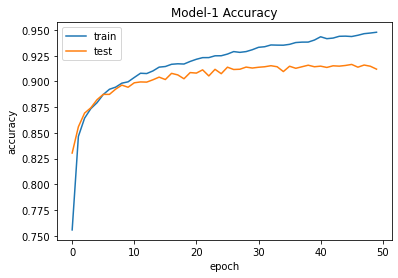

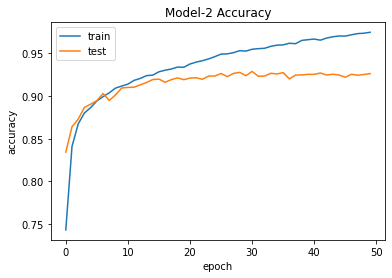

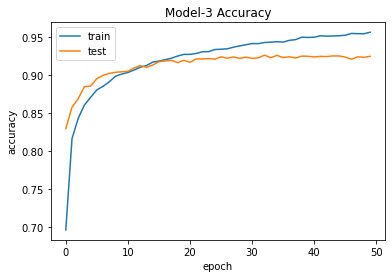

In [44]:
i = 1

for history in history_dict:
    
    accuracy = history_dict[history].history['accuracy']
    val_accuracy = history_dict[history].history['val_accuracy']
    
    plt.plot(accuracy)
    plt.plot(val_accuracy)
    plt.title('Model-{} Accuracy'.format(i))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    i+=1

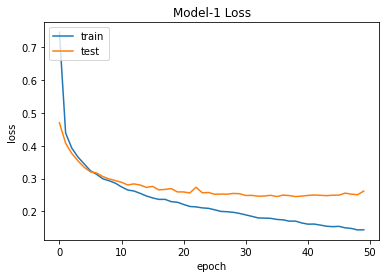

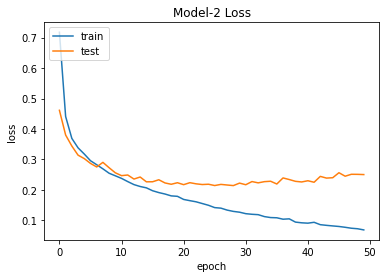

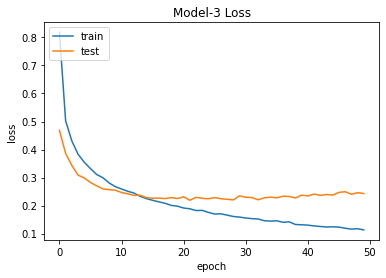

In [45]:
i = 1

for history in history_dict:
    
    loss = history_dict[history].history['loss']
    val_loss = history_dict[history].history['val_loss']
    
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model-{} Loss'.format(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    i+=1

#### Comparison of the validation accuracy and validation loss of all the 3 models

The point of this is to highlight the fact that more tunable/trainable parameters often result in a more accurate model. They might require a little more testing and training.

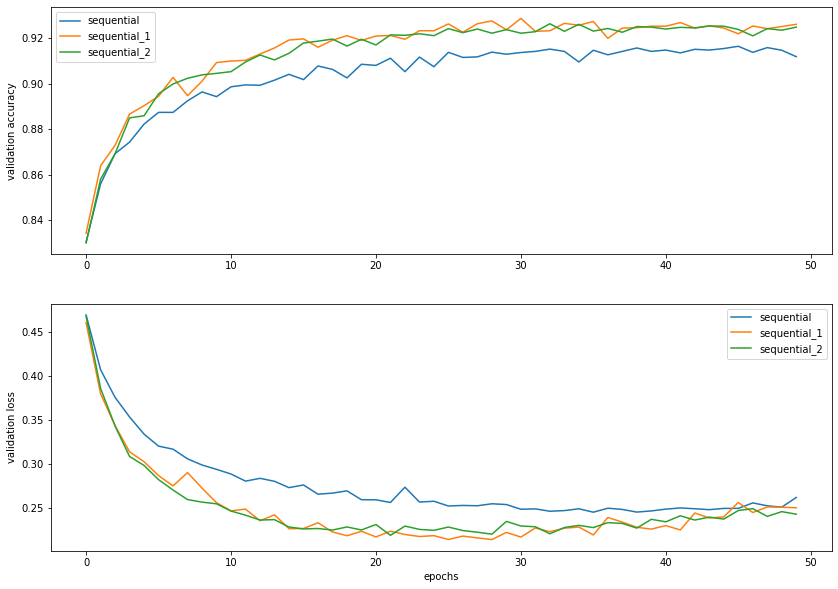

In [46]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10))

for history in history_dict:
    val_acc = history_dict[history].history['val_accuracy']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

#### Generating the classification report and confusion matrix for each model, to define the performance of the CNN models. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Classification Report of Model 1
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.87      0.87      1000
           3       0.91      0.94      0.92      1000
           4       0.91      0.86      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.83      0.78      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Confusion matrix of Model 1


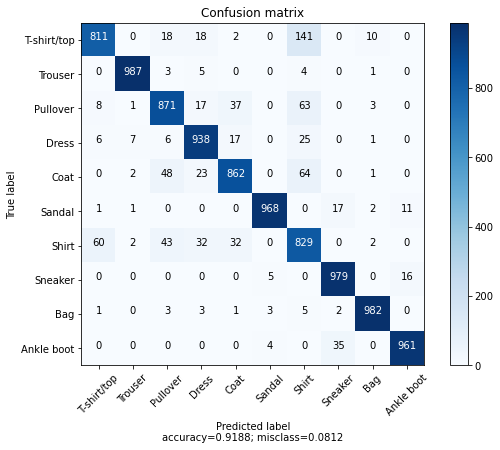





Classification Report of Model 2
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.91      0.88      0.90      1000
           3       0.93      0.94      0.93      1000
           4       0.93      0.87      0.90      1000
           5       0.99      0.98      0.98      1000
           6       0.78      0.81      0.79      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Confusion matrix of Model 2


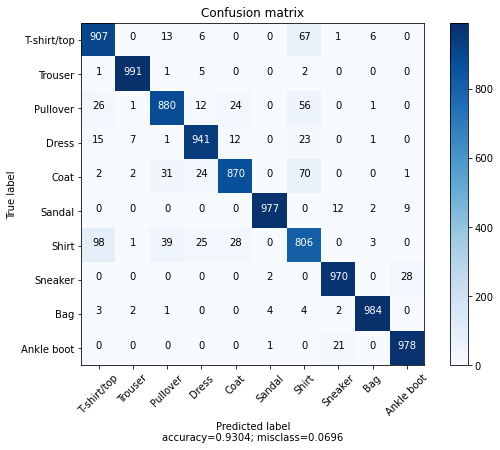





Classification Report of Model 3
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.88      0.89      1000
           3       0.94      0.93      0.94      1000
           4       0.88      0.91      0.89      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.79      0.80      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Confusion matrix of Model 3


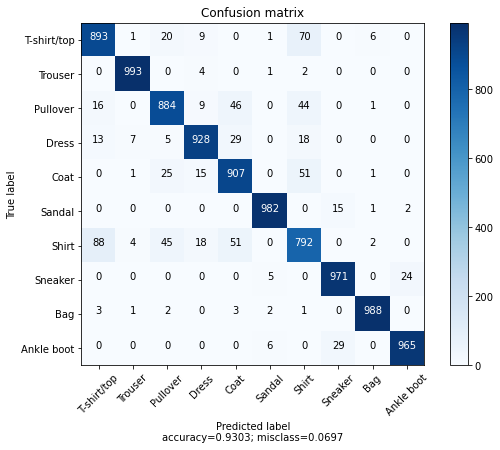

In [48]:
i = 1
for model in models:

    y_pred = model.predict(X_test)
    y_predClasses = [np.argmax(element) for element in y_pred]
    
    
    print('Classification Report of Model {}'.format(i))
    print(classification_report(y_test, y_predClasses))
    print('\n')
    
    print('Confusion matrix of Model {}'.format(i))
    plot_confusion_matrix(confusion_matrix(y_test, y_predClasses), normalize=False, 
                      target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
    print('\n')
    print('\n')
    i+=1

### Testing the Model (Only tested model_2)

###### Importing Libraries for uploading the image and preprocessing it to feed into the model

In [49]:
from PIL import Image
from keras.preprocessing.image import img_to_array
from skimage import data
from skimage.color import rgb2gray

#### Creating functions to preprocess and reshape the image, then converting into grayscale

In [51]:
def preprocess_image(image):
    
    image = image.resize((28, 28))
    image = img_to_array(image)
    #img = preprocess_input(img)
    image = np.expand_dims(image, axis=0)
    
    return image


def reshape_normalize(image):
    
    image = image.reshape(1, 28, 28, 1)
    image = image.astype('float32')
    image = image/255.0
    
    return image

##### Creating a function to output the prediction

In [55]:
def prediction(preprocessed_image):
    
    y = model_2.predict(preprocessed_image)
    val = np.argmax(y)
    
    labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    result = ''
    
    for i, dress in enumerate(labels):
        
        if val == i:
            result = dress
            break
        
    return result

#### Uploading the images

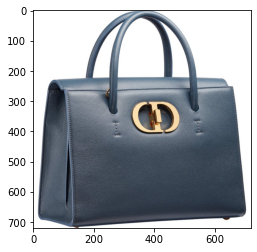

In [50]:
image_bag = "purse_ladies.jpg"

image1 = Image.open(image_bag)

plt.imshow(image1)

Preprocessing the image, and converting into grayscale since the model takes a grayscale image as input

In [52]:
image_array = preprocess_image(image1)

img_gray = rgb2gray(image_array)

img_normalize = reshape_normalize(img_gray)

In [56]:
prediction(img_normalize)

'Bag'

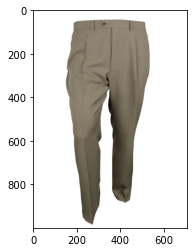

In [58]:
image_trouser = "trousers.jpg"

image2 = Image.open(image_trouser)

plt.imshow(image2)

Preprocessing the image, and converting into grayscale since the model takes a grayscale image as input

In [59]:
image_array2 = preprocess_image(image2)

img_gray2 = rgb2gray(image_array2)

img_normalize2 = reshape_normalize(img_gray2)

In [60]:
prediction(img_normalize2)

'Trouser'